# Notebook Contents

- [Imports](#Imports)
- [Data](#Data)
- [Spray Chart](#Spray-Chart)
    - [PHI Home Field Spray Chart](#PHI-Spray-Chart)
- [Batted Ball Profiles](#Batted-Ball-Profiles)
    - [Batted Ball Profile - LA](#Batted-Ball-Profile---LA)
    - [Batted Ball Profile - EV](#Batted-Ball-Profile---EV)
    - [Quality Contact by LA & EV](#Quality-Contact-by-Launch-Angle-&-Exit-Velocity)
    - [ISO Value by LA & EV](#ISO-Value-by-Launch-Angle-&-Exit-Velocity)
    - [BABIP Value by LA & EV](#BABIP-Value-by-Launch-Angle-&-Exit-Velocity)
    - [wOBA Value by LA & EV](#[wOBA-Value-by-Launch-Angle-&-Exit-Velocity)
    - [Estimated wOBA by LA & EV](#Estimated-wOBA-by-Launch-Angle-&-Exit-Velocity)
    - [Estimated BA by LA & EV](#Estimated-BA-by-Launch-Angle-&-Exit-Velocity)
    - [Home Runs by LA and EV](#Home-Runs-by-Launch-Angle-and-Exit-Velocity)
    - [xwOBA Against EV](#xwOBA-Against-EV)
    - [xwOBA Value of a Hit Against Its EV](#xwOBA-Value-of-a-Hit-Against-Its-Exit-Velocity)
- [Pitch Usage & Counts](#Pitch-Usage-&-Counts)
    - [Counts Breakdown](#Counts-Breakdown)
    - [Pitch Usage by Pitcher Handedness](#Pitch-Usage-by-Pitcher-Handedness)
    - [Pitch Type by Count](#Pitch-Type-by-Count)
- [Heatmaps](#Heatmaps)
    - [In-Zone Take Heatmaps - by Pitch Type vs. RHP](#In-Zone-Take-Heatmaps--by-Pitch-Type-vs.-RHP)
    - [In-Zone Take Heatmaps - by Pitch Type vs. LHP](#In-Zone-Take-Heatmaps--by-Pitch-Type-vs.-LHP)
    - [Out-of-Zone Chase Heatmaps - by Pitch Type vs. RHP](#Out-of-Zone-Chase-Heatmaps---by-Pitch-Type-vs.-RHP)
    - [Out-of-Zone Chase Heatmaps - by Pitch Type vs. LHP](#Out-of-Zone-Chase-Heatmaps---by-Pitch-Type-vs.-LHP)
    - [4-Seam Heatmaps](#4-Seam-Heatmaps)
    - [Slider Heatmaps](#Slider-Heatmaps)
    - [Sinker Heatmaps](#Sinker-Heatmaps)
    - [Changeup Heatmaps](#Changeup-Heatmaps)
    - [Curveball Heatmaps](#Curveball-Heatmaps)
    - [Cutter Heatmaps](#Cutter-Heatmaps)
    - [Knuckle Curve Heatmaps](#Knuckle-Curve-Heatmaps)
    - [Split-Finger Heatmaps](#Split-Finger-Heatmaps)
    - [Fastball Heatmaps](#Fastball-Heatmaps)
    - [Slow Curve Heatmaps](#Slow-Curve-Heatmaps)

# Imports

In [1]:
 from pybaseball import spraychart
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings('ignore')

In [2]:
swanson = pd.read_csv('../data/dansby-swanson.csv')
swanson.drop(columns = ['Unnamed: 0'], inplace = True)

# Font Dictionary
font_title = {
    'size': 12,
    'weight': 'bold',
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

pd.set_option('max_columns', None)
print(swanson.shape)
swanson.head(2)

(2578, 93)


,pitch_type,game_date,player_name,launch_speed,launch_angle,hit_distance_sc,hc_x,hc_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,type,hit_location,bb_type,events,description,des,balls,strikes,pitch_count,zone,is_strike,swing_miss,first_pitch_take,first_pitch_swing,in_zone_take,out_of_zone_chase,release_speed,release_spin_rate,spin_axis,pfx_x,pfx_-x,pfx_z,release_pos_x,release_pos_z,effective_speed,release_extension,release_pos_y,plate_-x,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,stand,p_throws,release_speed.1,release_spin_rate.1,spin_axis.1,pfx_x.1,pfx_-x.1,pfx_z.1,release_pos_x.1,release_pos_z.1,effective_speed.1,release_extension.1,release_pos_y.1,plate_-x.1,plate_x.1,plate_z.1,batter,pitcher,home_team,away_team,if_fielding_alignment,of_fielding_alignment,game_pk,at_bat_number,pitch_number,pitch_name,home_score,away_score,post_away_score,post_home_score,delta_home_win_exp,delta_run_exp,game_year
0,FF,2021-10-03,"Swanson, Dansby",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,NaN,S,2.0,NaN,strikeout,swinging_strike,Dansby Swanson strikes out swinging.,1,2,1-2,3,1,1,0,0,0,0,92.0,2208.0,203.0,0.14,-1.68,8.28,-2.0,5.19,93.5,6.8,53.67,-0.53,0.53,3.26,NaN,NaN,NaN,2,6,Bot,664850,6.170758,-133.962806,-0.638454,0.603948,24.763260,-23.806454,3.41,1.56,R,R,92.0,2208.0,203.0,0.14,-1.68,8.28,-2.0,5.19,93.5,6.8,53.67,-0.53,0.53,3.26,621020,592866,ATL,NYM,Infield shift,Standard,632254,46,5,4-Seam Fastball,5,0,0,5,-0.001,-0.073,2021
1,FF,2021-10-03,"Swanson, Dansby",82.4,30.0,273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,foul,Dansby Swanson strikes out swinging.,1,2,1-2,12,1,0,0,0,0,0,93.5,2137.0,210.0,0.01,-0.12,9.48,-2.1,5.13,94.7,6.7,53.84,-0.87,0.87,2.74,NaN,NaN,NaN,2,6,Bot,664850,7.673758,-136.110030,-2.235441,-1.328747,25.813549,-22.006688,3.41,1.56,R,R,93.5,2137.0,210.0,0.01,-0.12,9.48,-2.1,5.13,94.7,6.7,53.84,-0.87,0.87,2.74,621020,592866,ATL,NYM,Infield shift,Standard,632254,46,4,4-Seam Fastball,5,0,0,5,0.000,0.000,2021


In [3]:
zero_zero = swanson.loc[(swanson['pitch_count'] == '0-0')]
zero_zero.description.value_counts()

ball               249
called_strike      162
foul                92
hit_into_play       79
swinging_strike     68
hit_by_pitch         1
Name: description, dtype: int64

In [4]:
swanson.groupby(['bb_type']).mean()

,launch_speed,launch_angle,hit_distance_sc,hc_x,hc_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,hit_location,balls,strikes,zone,is_strike,swing_miss,first_pitch_take,first_pitch_swing,in_zone_take,out_of_zone_chase,release_speed,release_spin_rate,spin_axis,pfx_x,pfx_-x,pfx_z,release_pos_x,release_pos_z,effective_speed,release_extension,release_pos_y,plate_-x,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,release_speed.1,release_spin_rate.1,spin_axis.1,pfx_x.1,pfx_-x.1,pfx_z.1,release_pos_x.1,release_pos_z.1,effective_speed.1,release_extension.1,release_pos_y.1,plate_-x.1,plate_x.1,plate_z.1,batter,pitcher,game_pk,at_bat_number,pitch_number,home_score,away_score,post_away_score,post_home_score,delta_home_win_exp,delta_run_exp,game_year
bb_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
fly_ball,93.472581,36.193548,325.750000,135.732823,80.073145,0.309250,0.533548,0.539113,1.000000,0.104839,0.701613,4.120968,8.319588,1.201613,1.112903,5.112903,1.0,0.0,0.0,0.185484,0.0,0.0,89.267742,2224.427419,175.379032,-0.048306,0.579677,8.653548,-0.615484,5.936532,89.456452,6.367742,54.135726,-0.038871,0.038871,2.575242,594339.055556,588008.392857,620481.069767,1.080645,4.951613,586058.806452,1.806937,-129.874530,-3.796937,-1.491945,26.797189,-22.554109,3.41,1.56,89.267742,2224.427419,175.379032,-0.048306,0.579677,8.653548,-0.615484,5.936532,89.456452,6.367742,54.135726,-0.038871,0.038871,2.575242,621020.0,589636.459677,633401.129032,40.072581,3.467742,2.483871,2.806452,3.024194,2.717742,0.001766,0.205556,2021.0
ground_ball,83.488953,-11.680233,32.133721,111.029186,155.153605,0.232983,0.215442,0.255233,0.994186,0.244186,0.011628,2.313953,5.186047,1.133721,1.098837,7.715116,1.0,0.0,0.0,0.174419,0.0,0.0,88.405233,2186.220930,171.430233,-0.143663,1.723953,6.620930,-1.056279,5.797442,88.583721,6.337791,54.162674,-0.068953,0.068953,2.223430,587259.700000,614331.606061,602699.388889,1.029070,4.918605,579912.645349,3.123748,-128.605875,-3.807382,-3.112693,25.980761,-24.842363,3.41,1.56,88.405233,2186.220930,171.430233,-0.143663,1.723953,6.620930,-1.056279,5.797442,88.583721,6.337791,54.162674,-0.068953,0.068953,2.223430,621020.0,594461.232558,633428.575581,38.453488,3.447674,2.279070,2.459302,2.470930,2.296512,0.002221,-0.070250,2021.0
line_drive,94.970476,16.742857,249.285714,112.351238,98.098952,0.619771,0.653924,0.654286,1.000000,0.609524,0.276190,4.142857,7.336538,1.085714,1.066667,6.333333,1.0,0.0,0.0,0.200000,0.0,0.0,87.833333,2209.752381,177.076190,-0.102952,1.235429,7.257143,-1.043048,5.828571,88.083810,6.400000,54.095238,0.019333,-0.019333,2.377524,618781.000000,556135.875000,623462.285714,0.990476,4.847619,588972.409524,2.820026,-127.768092,-3.511278,-2.221822,25.896540,-24.267444,3.41,1.56,87.833333,2209.752381,177.076190,-0.102952,1.235429,7.257143,-1.043048,5.828571,88.083810,6.400000,54.095238,0.019333,-0.019333,2.377524,621020.0,596814.980952,633435.800000,37.657143,3.295238,2.171429,2.333333,2.466667,2.295238,-0.001657,0.327467,2021.0
popup,80.860714,64.285714,131.928571,136.109643,158.192500,0.045821,0.043714,0.032143,1.000000,0.000000,0.000000,2.928571,4.071429,1.214286,1.214286,6.000000,1.0,0.0,0.0,0.178571,0.0,0.0,89.539286,2374.750000,157.892857,0.048571,-0.582857,8.271429,-1.237143,5.795000,89.367857,6.182143,54.320714,0.157143,-0.157143,2.720000,617479.000000,596184.666667,615266.444444,1.071429,5.428571,601060.892857,2.634700,-130.315725,-3.081357,-0.840575,27.471851,-23.310226,3.41,1.56,89.539286,2374.750000,157.892857,0.048571,-0.582857,8.271429,-1.237143,5.795000,89.367857,6.182143,54.320714,0.157143,-0.157143,2.720000,621020.0,598368.071429,633384.750000,42.857143,3.642857,2.428571,2.821429,2.821429,2.428571,0.001679,-0.221857,2021.0


In [5]:
full_count = swanson.loc[swanson['pitch_count'] == '3-2']
r_swanson = swanson.loc[swanson['p_throws'] == 'R']
l_swanson = swanson.loc[swanson['p_throws'] == 'L']

ff = swanson.loc[swanson['pitch_type'] == 'FF']
sl = swanson.loc[swanson['pitch_type'] == 'SL']
si = swanson.loc[swanson['pitch_type'] == 'SI']
ch = swanson.loc[swanson['pitch_type'] == 'CH']
cu = swanson.loc[swanson['pitch_type'] == 'CU']
fc = swanson.loc[swanson['pitch_type'] == 'FC']
kc = swanson.loc[swanson['pitch_type'] == 'KC']
fs = swanson.loc[swanson['pitch_type'] == 'FS']
fa = swanson.loc[swanson['pitch_type'] == 'FA']
cs = swanson.loc[swanson['pitch_type'] == 'CS']

r_ff = swanson.loc[(swanson['pitch_type'] == 'FF') & (swanson['p_throws'] == 'R')]
r_sl = swanson.loc[(swanson['pitch_type'] == 'SL') & (swanson['p_throws'] == 'R')]
r_si = swanson.loc[(swanson['pitch_type'] == 'SI') & (swanson['p_throws'] == 'R')]
r_ch = swanson.loc[(swanson['pitch_type'] == 'CH') & (swanson['p_throws'] == 'R')]
r_cu = swanson.loc[(swanson['pitch_type'] == 'CU') & (swanson['p_throws'] == 'R')]
r_fc = swanson.loc[(swanson['pitch_type'] == 'FC') & (swanson['p_throws'] == 'R')]
r_kc = swanson.loc[(swanson['pitch_type'] == 'KC') & (swanson['p_throws'] == 'R')]
r_fs = swanson.loc[(swanson['pitch_type'] == 'FS') & (swanson['p_throws'] == 'R')]
r_fa = swanson.loc[(swanson['pitch_type'] == 'FA') & (swanson['p_throws'] == 'R')]
r_cs = swanson.loc[(swanson['pitch_type'] == 'CS') & (swanson['p_throws'] == 'R')]

l_ff = swanson.loc[(swanson['pitch_type'] == 'FF') & (swanson['p_throws'] == 'L')]
l_sl = swanson.loc[(swanson['pitch_type'] == 'SL') & (swanson['p_throws'] == 'L')]
l_si = swanson.loc[(swanson['pitch_type'] == 'SI') & (swanson['p_throws'] == 'L')]
l_ch = swanson.loc[(swanson['pitch_type'] == 'CH') & (swanson['p_throws'] == 'L')]
l_cu = swanson.loc[(swanson['pitch_type'] == 'CU') & (swanson['p_throws'] == 'L')]
l_fc = swanson.loc[(swanson['pitch_type'] == 'FC') & (swanson['p_throws'] == 'L')]
l_kc = swanson.loc[(swanson['pitch_type'] == 'KC') & (swanson['p_throws'] == 'L')]
l_fs = swanson.loc[(swanson['pitch_type'] == 'FS') & (swanson['p_throws'] == 'L')]
l_fa = swanson.loc[(swanson['pitch_type'] == 'FA') & (swanson['p_throws'] == 'L')]
l_cs = swanson.loc[(swanson['pitch_type'] == 'CS') & (swanson['p_throws'] == 'L')]

# Spray Chart

### ATL Spray Chart

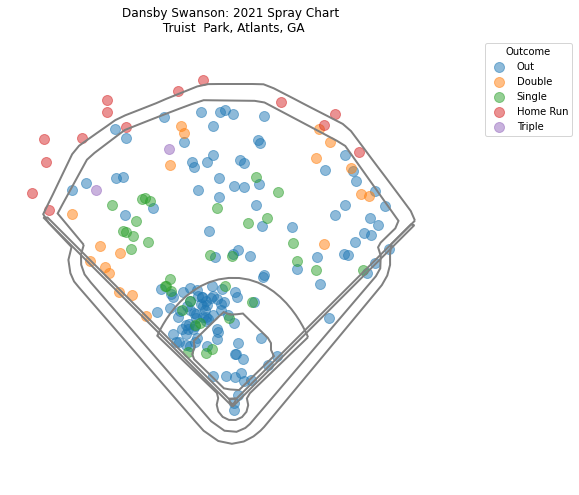

In [6]:
spray_atl = swanson[swanson['home_team'] == 'ATL']
spraychart(spray_atl, 'braves', title = 'Dansby Swanson: 2021 Spray Chart \n Truist  Park, Atlants, GA');

# Pitch Usage / Counts

### Pitch Usage by Pitcher Handedness 

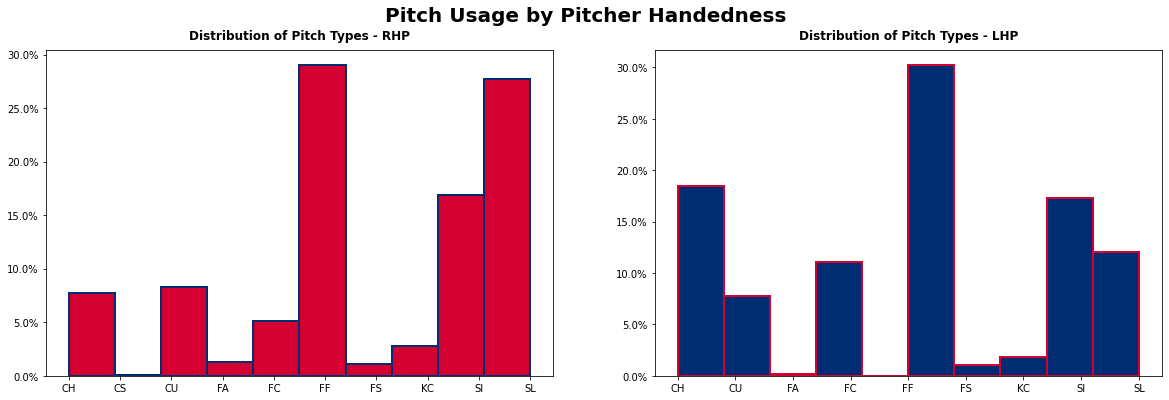

In [7]:
r_swanson.dropna(subset=['pitch_type'], inplace = True)
l_swanson.dropna(subset=['pitch_type'], inplace = True)

blue = '#002D72'
red = '#D50032'
fig, axs = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Pitch Usage by Pitcher Handedness', fontsize = 20, fontweight = 'bold')

dist_r = r_swanson.pitch_type.sort_values()
axs[0].hist(dist_r, weights = np.ones(len(dist_r)) / len(dist_r), color = red, edgecolor = blue, linewidth = 2)
axs[0].yaxis.set_major_formatter(PercentFormatter(1))
axs[0].set_title('Distribution of Pitch Types - RHP', fontdict = font_title, pad = 15)

dist_l = l_swanson.pitch_type.sort_values()
axs[1].hist(dist_l, weights = np.ones(len(dist_l)) / len(dist_l), color = blue, edgecolor = red, linewidth = 2)
axs[1].yaxis.set_major_formatter(PercentFormatter(1))
axs[1].set_title('Distribution of Pitch Types - LHP', fontdict = font_title, pad = 15);

### Pitch Type by Count

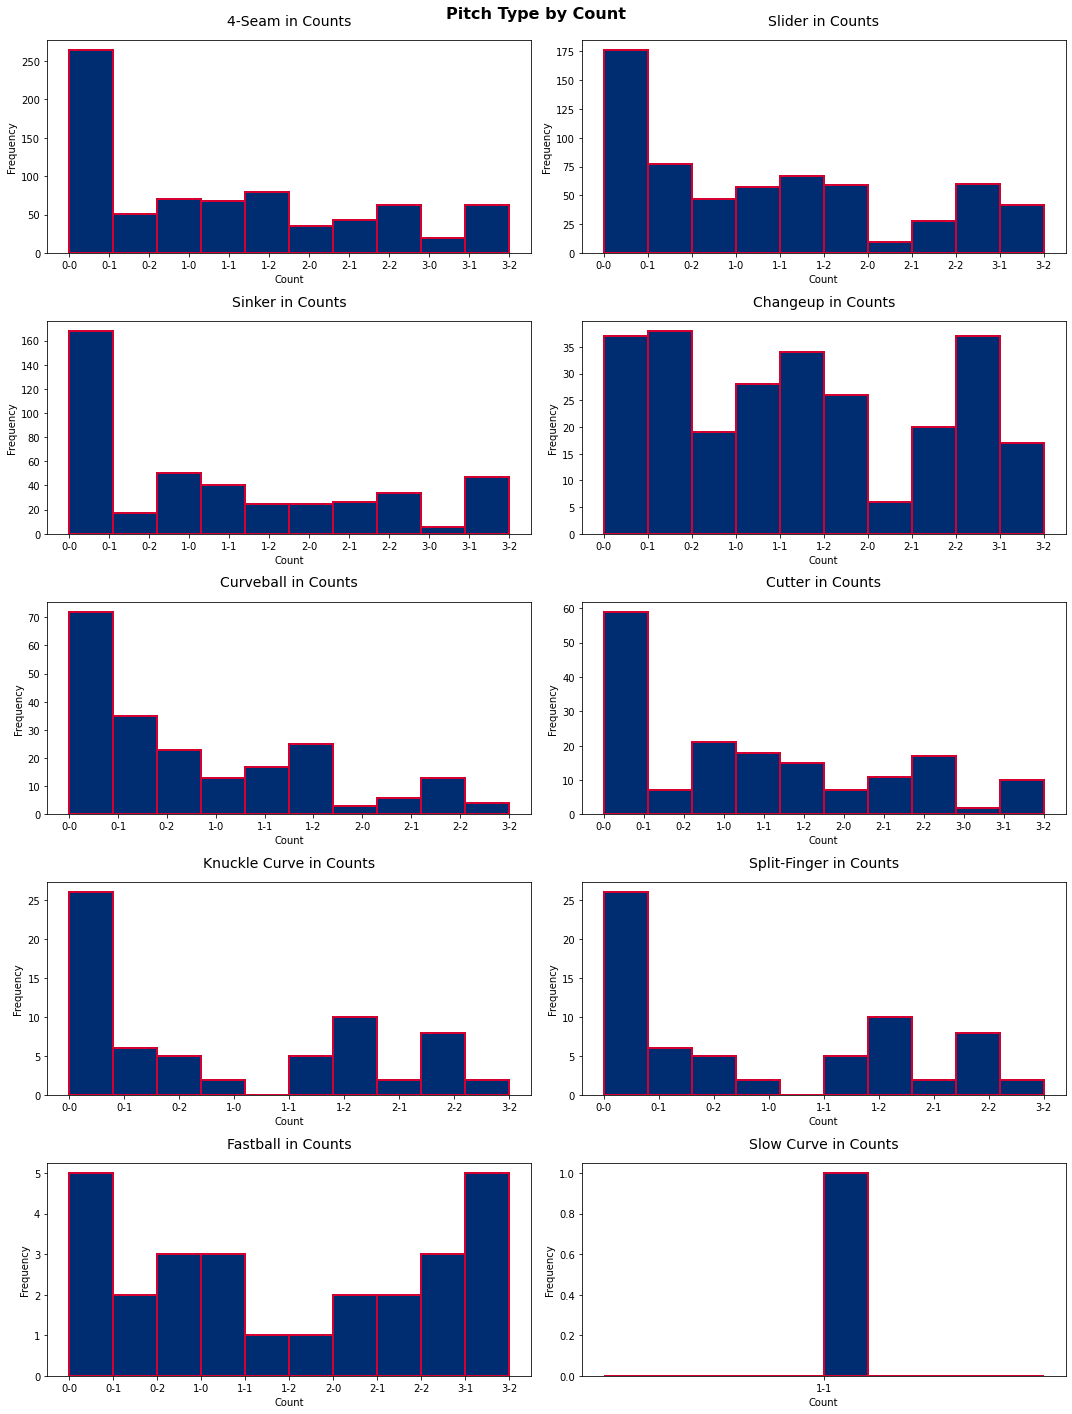

In [8]:
fig, axs = plt.subplots(5, 2, figsize = (15, 20))
fig.suptitle('Pitch Type by Count', fontsize = 16, fontweight = 'bold')
plt.setp(axs[0:, :], xlabel = 'Count')
plt.setp(axs[:, 0:], ylabel = 'Frequency')
axs[0][0].hist(ff['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][0].set_title('4-Seam in Counts', fontsize = 14, pad = 15)
axs[0][1].hist(sl['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][1].set_title('Slider in Counts', fontsize = 14, pad = 15)
axs[1][0].hist(si['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][0].set_title('Sinker in Counts', fontsize = 14, pad = 15)
axs[1][1].hist(ch['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][1].set_title('Changeup in Counts', fontsize = 14, pad = 15)
axs[2][0].hist(cu['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[2][0].set_title('Curveball in Counts', fontsize = 14, pad = 15)
axs[2][1].hist(fc['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[2][1].set_title('Cutter in Counts', fontsize = 14, pad = 15)
axs[3][0].hist(kc['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[3][0].set_title('Knuckle Curve in Counts', fontsize = 14, pad = 15)
axs[3][1].hist(kc['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[3][1].set_title('Split-Finger in Counts', fontsize = 14, pad = 15)
axs[4][0].hist(fa['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[4][0].set_title('Fastball in Counts', fontsize = 14, pad = 15)
axs[4][1].hist(cs['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[4][1].set_title('Slow Curve in Counts', fontsize = 14, pad = 15)
plt.tight_layout();

# Pitch Location

### Pitch Location - All Pitches

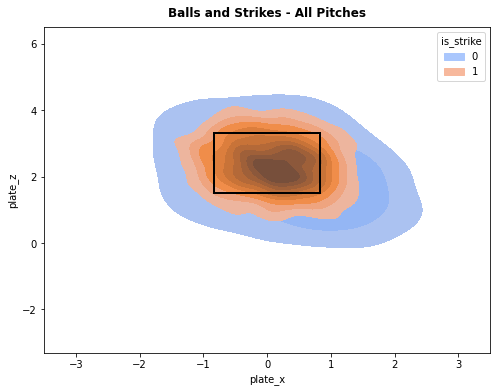

In [9]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = swanson, x = 'plate_x', y = 'plate_z', hue = 'is_strike', fill = True, palette = 'coolwarm')
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.xlim(-3.5, 3.5)
plt.title('Balls and Strikes - All Pitches', fontdict = font_title, pad = 15);

# Heatmaps

### 4-Seam Heatmaps

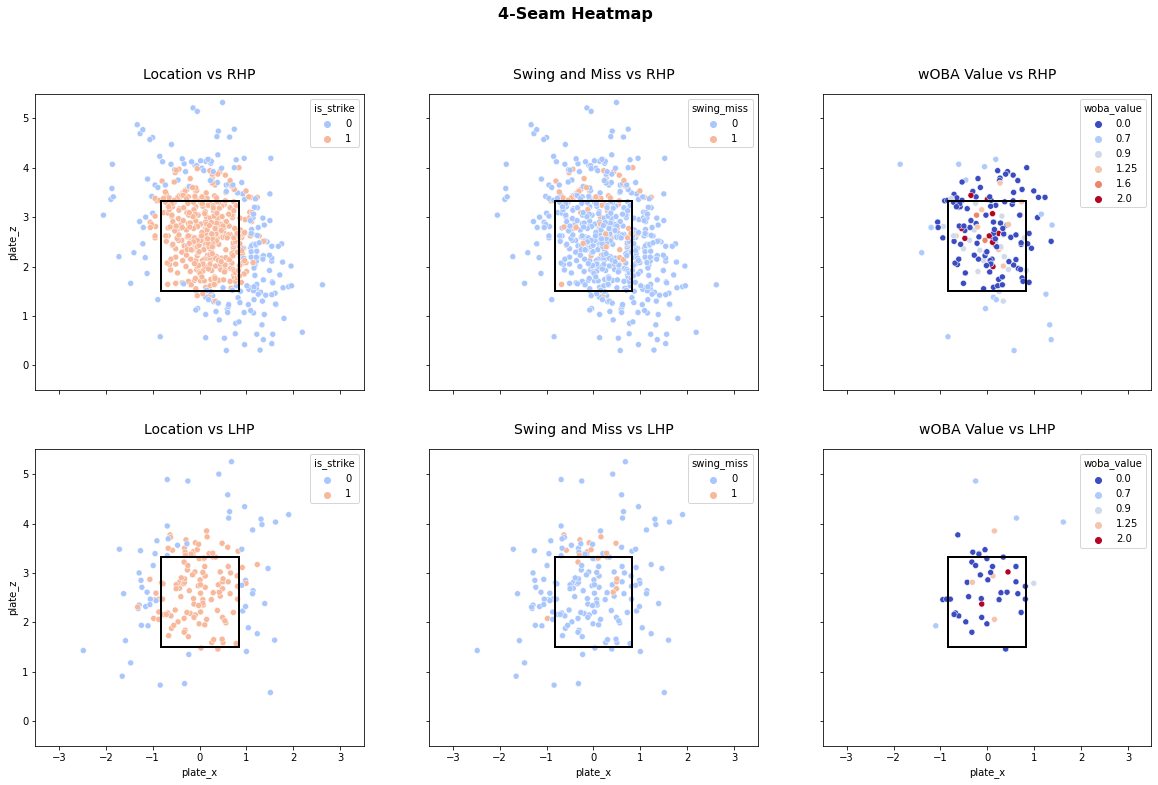

In [10]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('4-Seam Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Slider Heatmaps

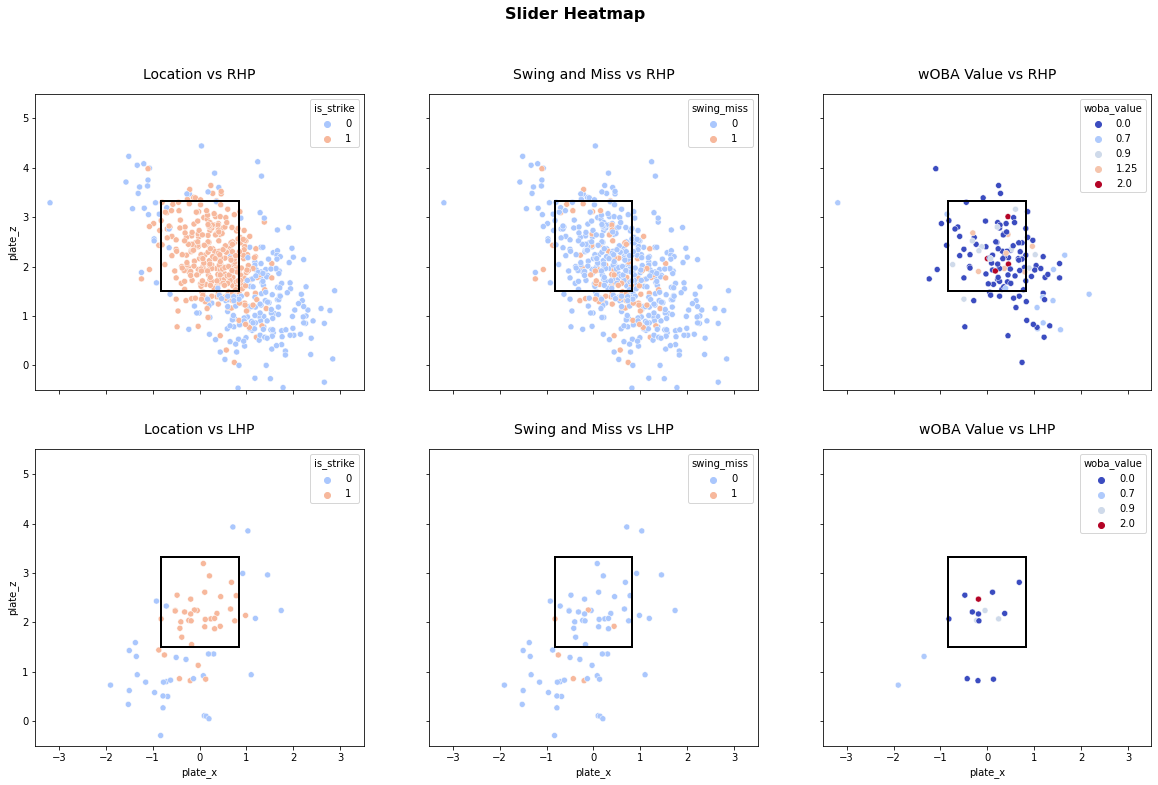

In [11]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Slider Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Sinker Heatmaps

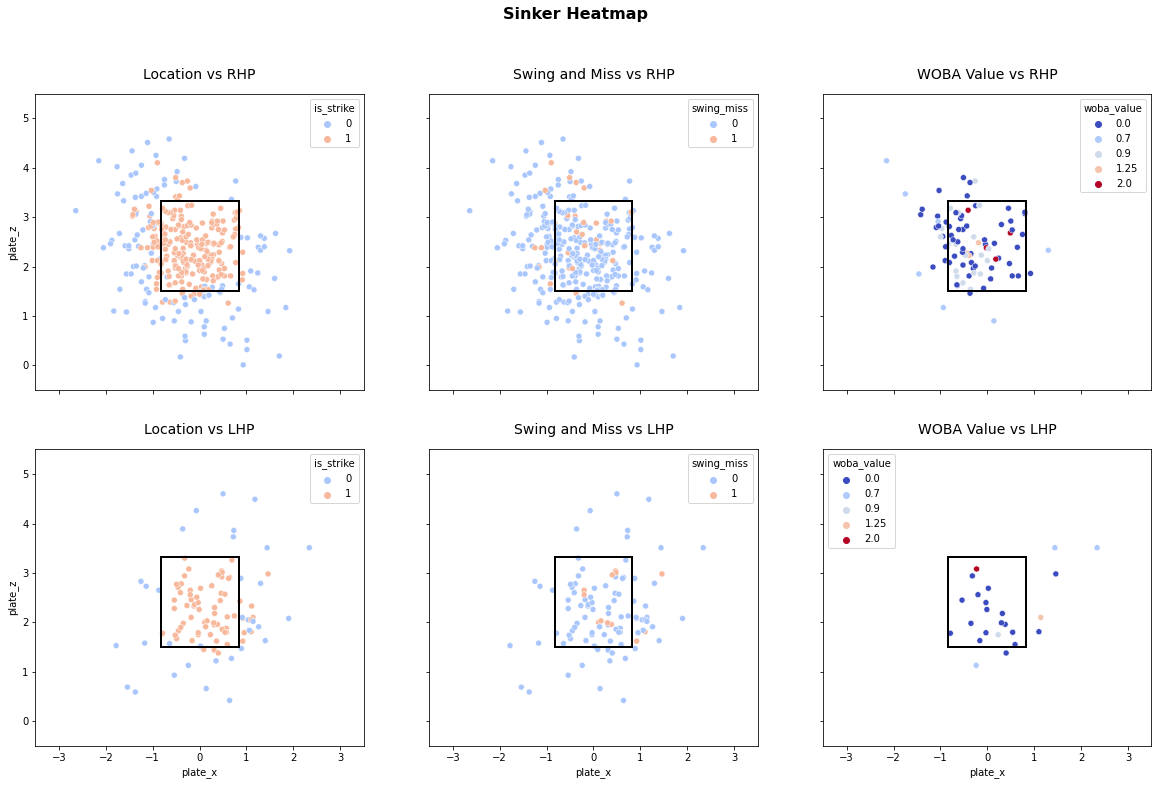

In [12]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Sinker Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHP', fontsize = 14, pad = 15);

### Changeup Heatmaps

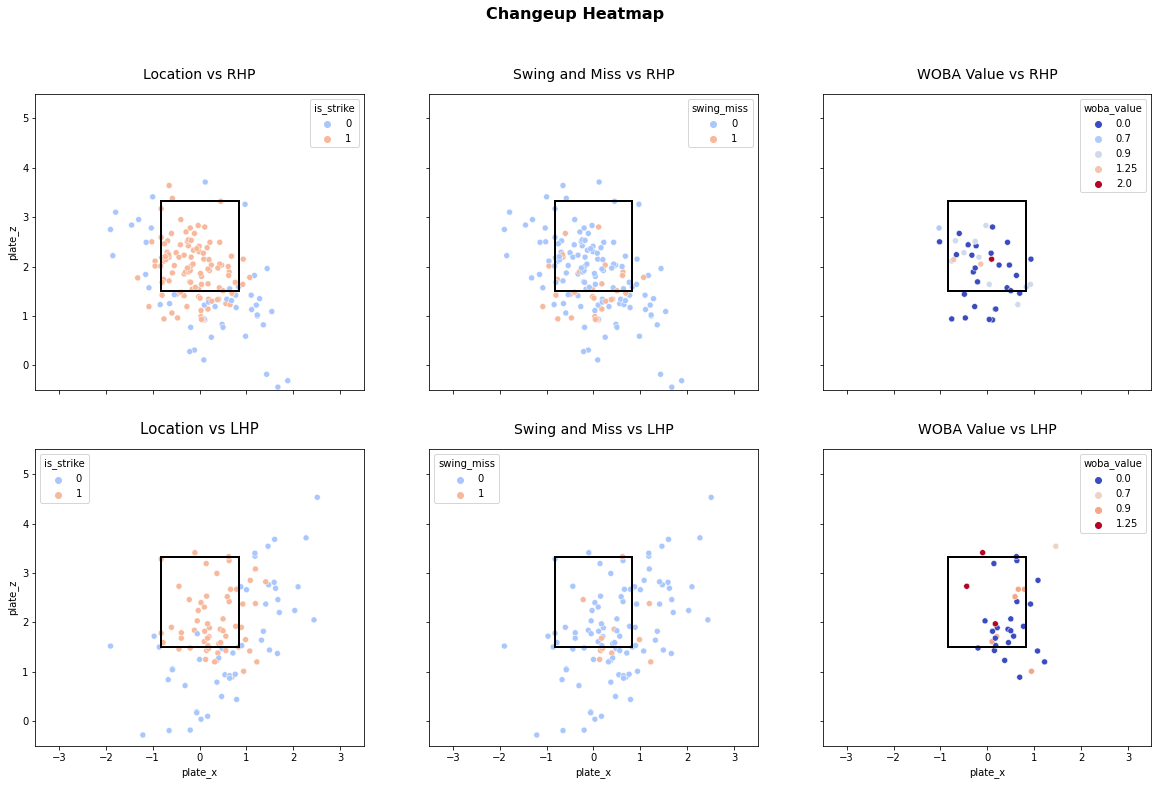

In [13]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Changeup Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 15, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHP', fontsize = 14, pad = 15);

### Curveball Heatmaps

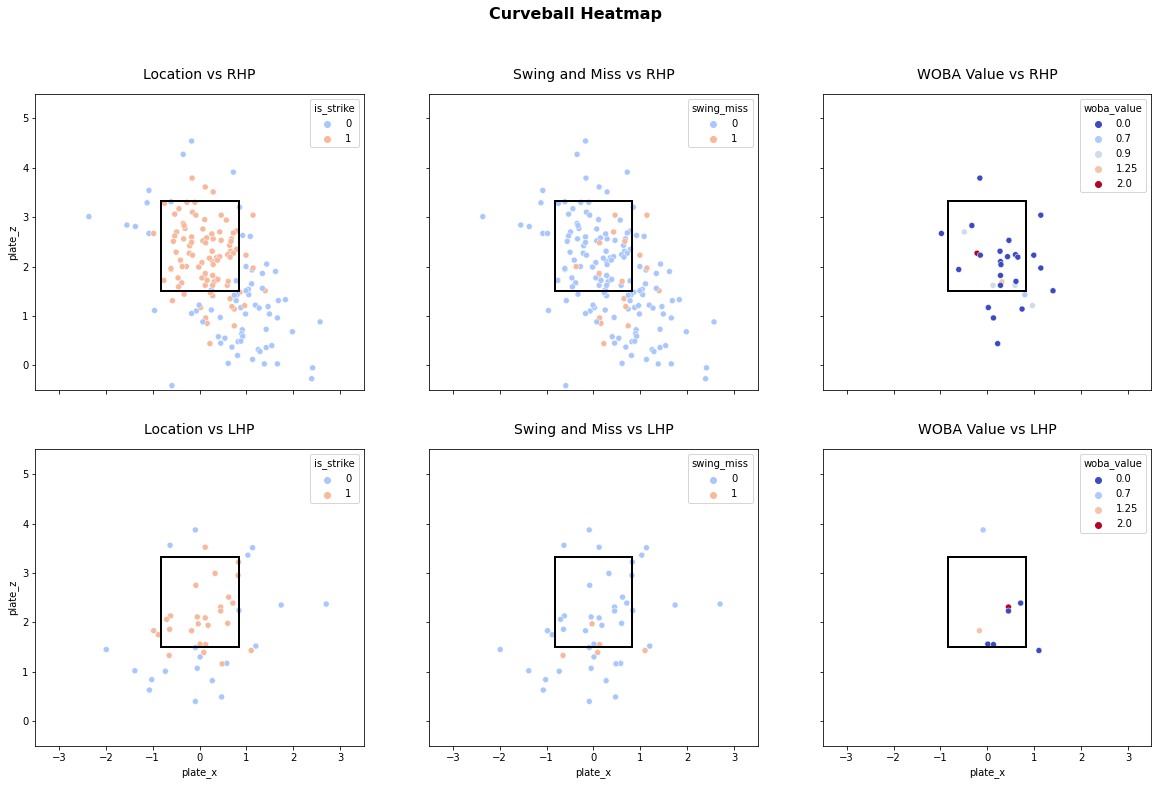

In [14]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Curveball Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHP', fontsize = 14, pad = 15);

### Cutter Heatmaps

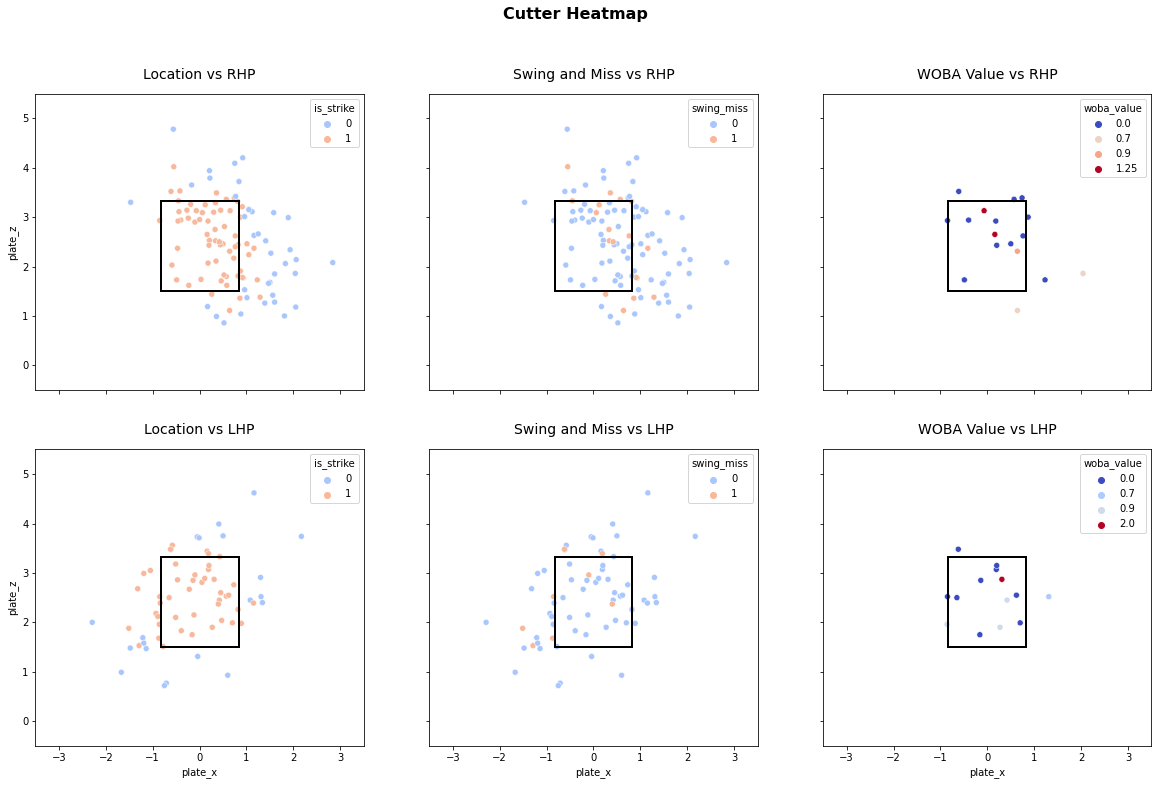

In [15]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Cutter Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_fc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_fc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_fc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_fc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_fc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_fc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHP', fontsize = 14, pad = 15);

### Knuckle Curve Heatmaps

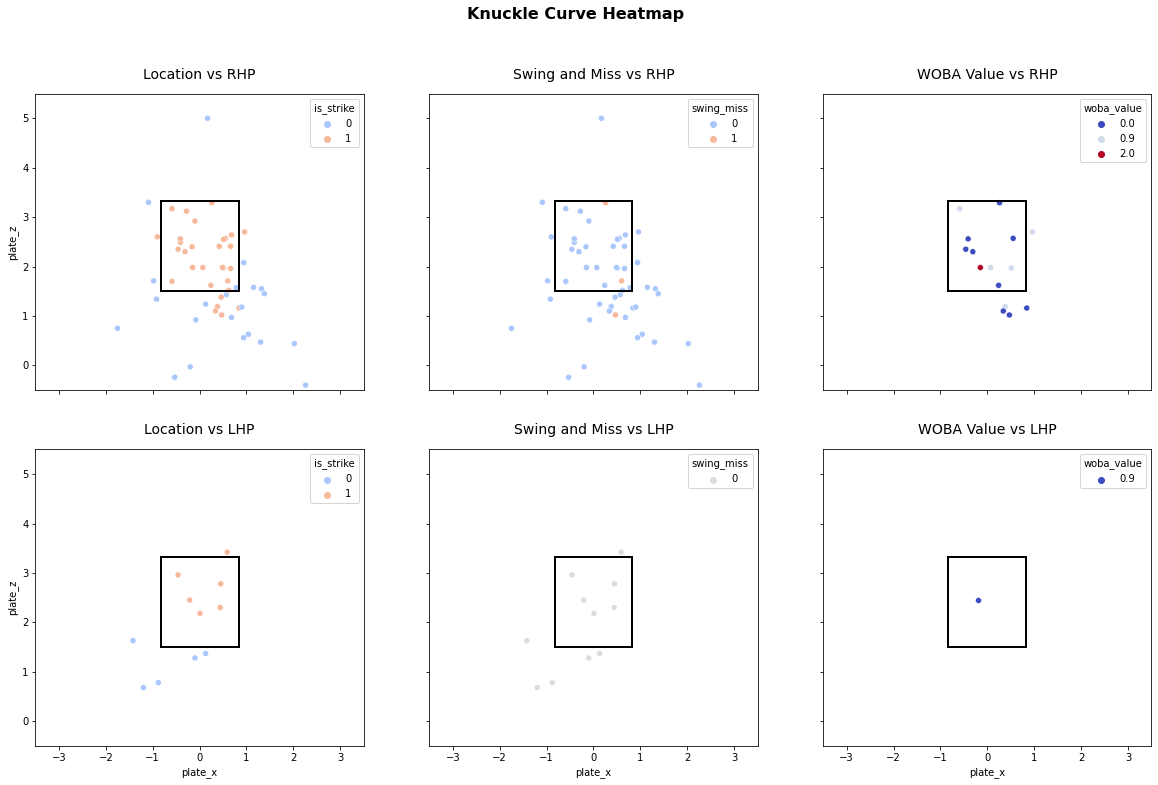

In [16]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Knuckle Curve Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_kc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_kc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_kc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_kc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_kc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_kc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHP', fontsize = 14, pad = 15);

### Split-Finger Heatmaps

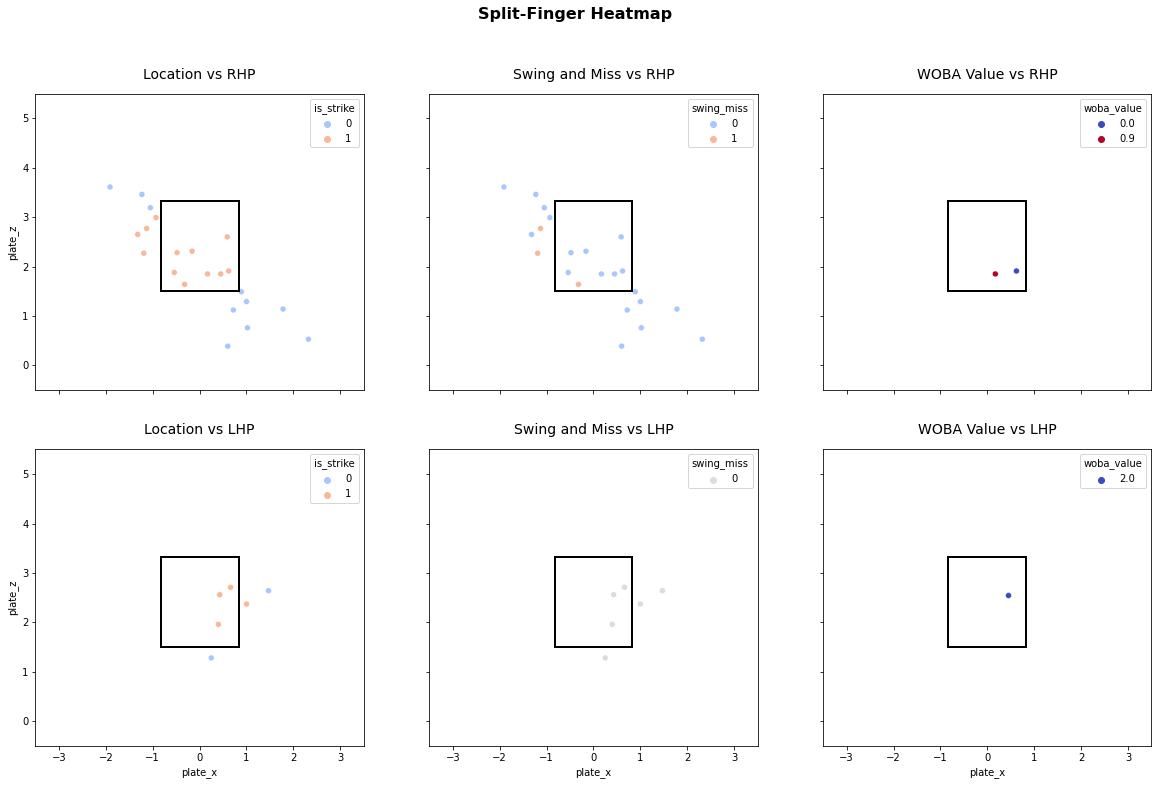

In [17]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Split-Finger Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_fs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_fs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_fs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_fs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_fs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_fs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHP', fontsize = 14, pad = 15);

### Fastball Heatmaps

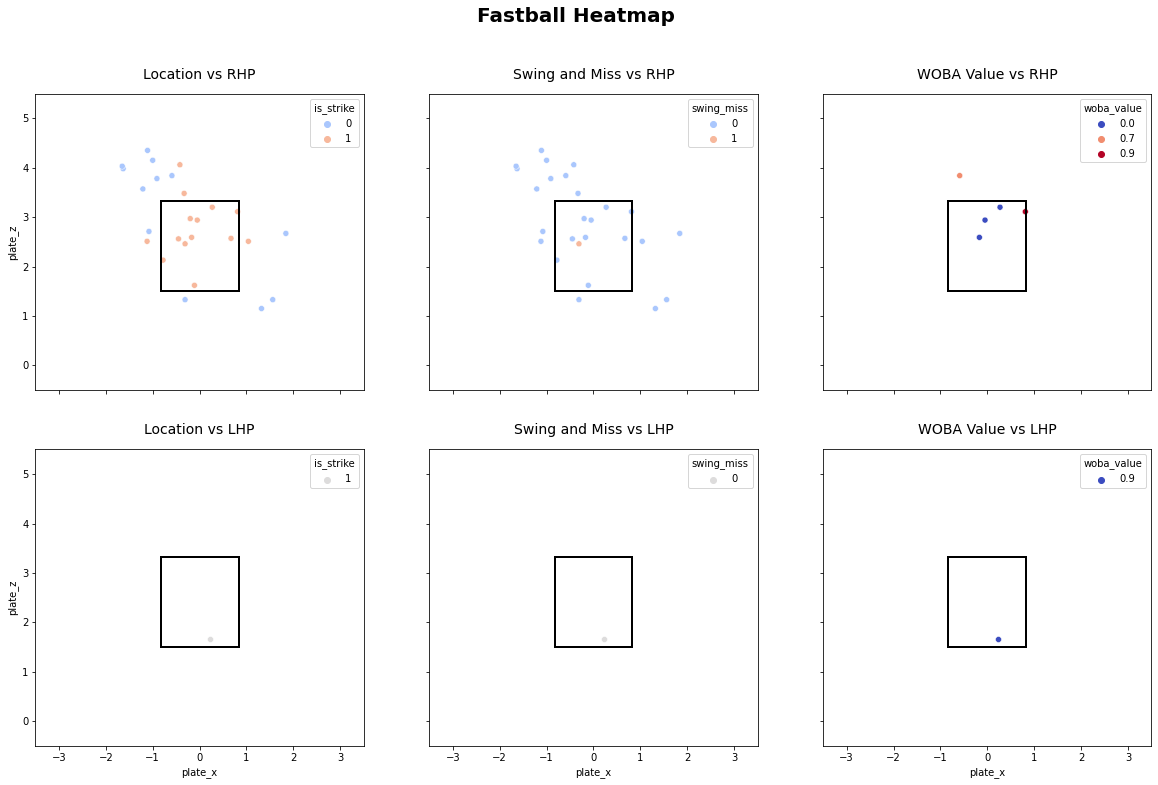

In [18]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Fastball Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_fa,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_fa,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_fa,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_fa,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_fa,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_fa,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHP', fontsize = 14, pad = 15);

### Slow Curve Heatmaps

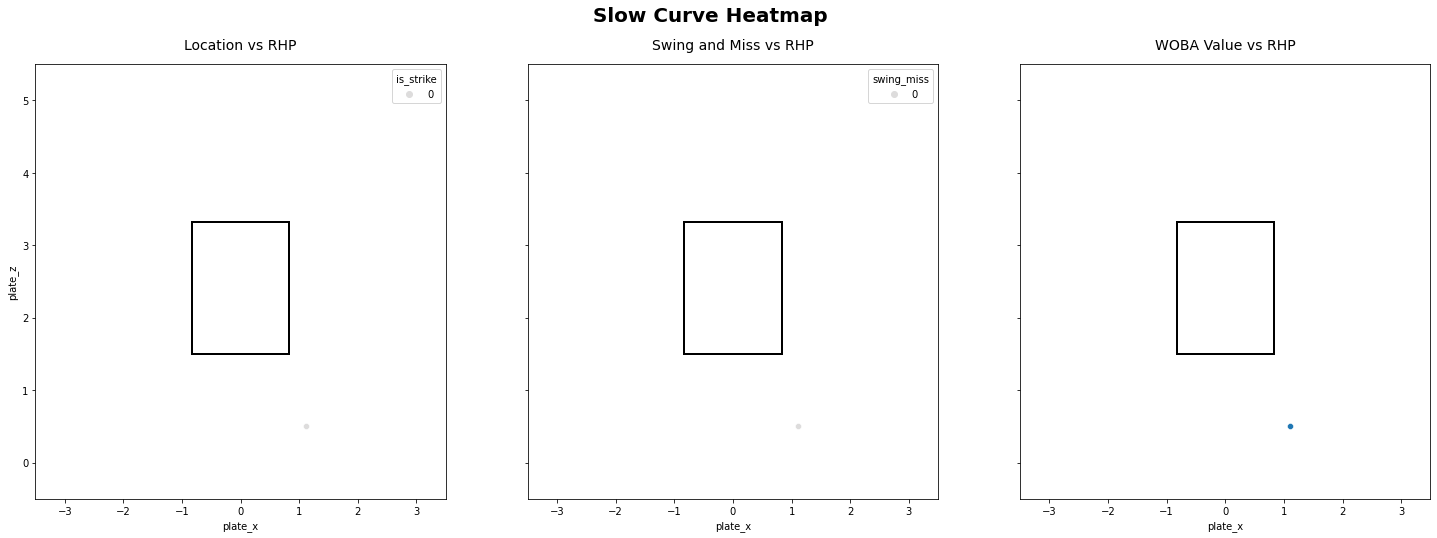

In [19]:
fig, axs = plt.subplots(1, 3, figsize = (25, 8), sharex = True, sharey = True)
fig.suptitle('Slow Curve Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0],data = r_cs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1],data = r_cs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2],data = r_cs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2].set_title('WOBA Value vs RHP', fontsize = 14, pad = 15);